# Import Necessary Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data/Netflix dataset.csv


# Load the Data

In [3]:
# Load the dataset
file_path = '/kaggle/input/netflix-data/Netflix dataset.csv'
data = pd.read_csv(file_path)

In [4]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Cleaning

## Check for Duplicates: If duplicates exist, remove them 

In [7]:
data.duplicated().sum()
# data = data.drop_duplicates()

0

*In the case of this data there are no duplicates so no need to run line 2 from the cell above*

# Handle Missing Values: 

We check for missing values and decide how to handle them (e.g., filling with mean, median, or a placeholder).

In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

<Axes: >

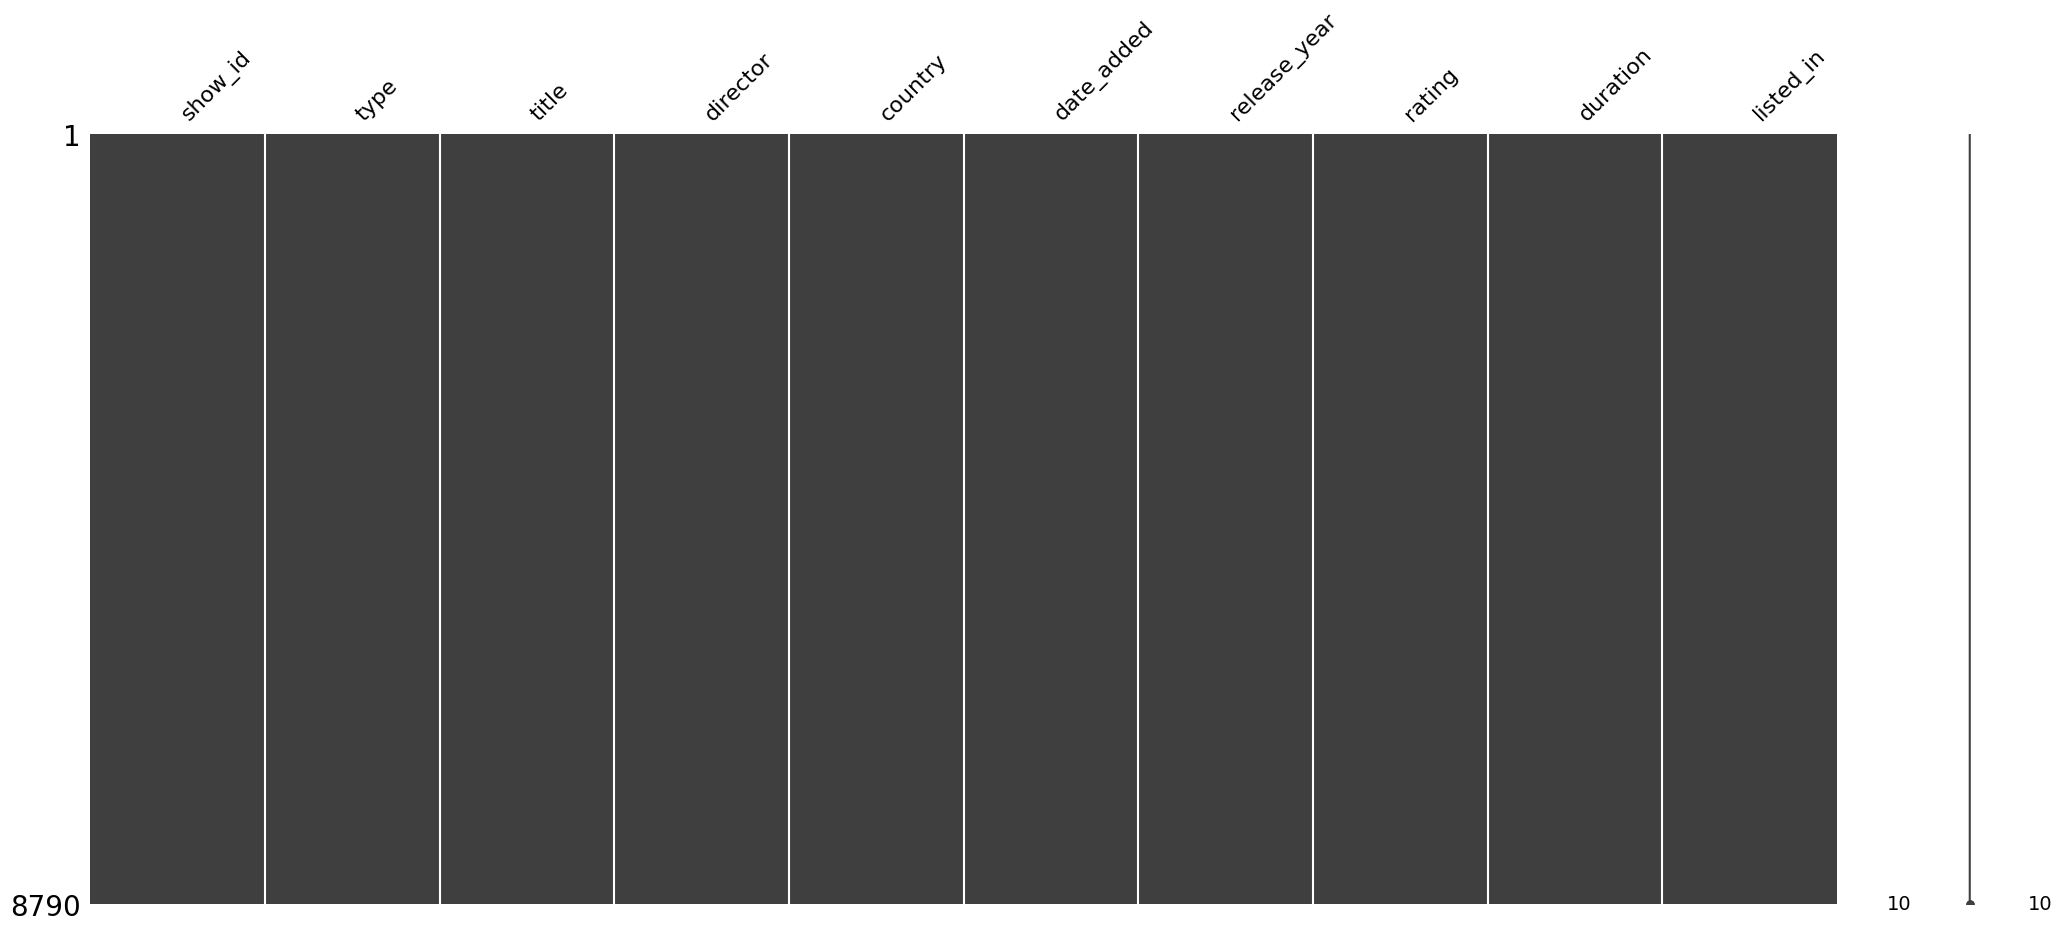

In [9]:
msno.matrix(data)  # Visualize missing data

From the above output and graph we there are no missing values from out dataset.

# Handle Duplicate Values: 

We check for duplicates values and remove them

In [10]:
print("Number of duplicates:", data.duplicated().sum())
# df = df.drop_duplicates()

Number of duplicates: 0


# Outlier dictection:

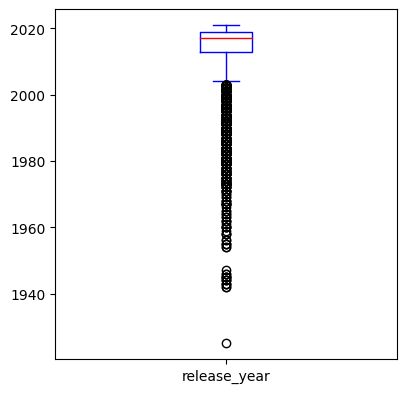

In [11]:
boxplot = data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

plt.show()

# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [23]:
data.drop(data[data["release_year"] == 1925].index, inplace = True)

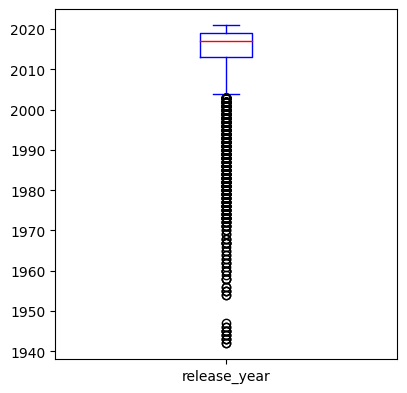

In [24]:
boxplot = data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

plt.show()

In [ ]:
data.describe()

## Column Types:

Review column data types and convert as needed (e.g., date columns).

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_added'].info()

## Descriptive Statistics for Categorical Columns:

In [ ]:
data.describe(include="O")

## Data Visualization

## Univariate Analysis:
Histograms for continuous variables and bar plots for categorical variables.

In [ ]:
df.hist(bins=30, figsize=(10, 8))
plt.show()

# Hypothesis 1: Netflix releases more movies than TV shows annually.

In [ ]:
# Group data by type and release year
hypothesis_1 = data.groupby(['release_year', 'type']).size().unstack()

In [ ]:
# Plot the trend
plt.figure(figsize=(12, 6))
hypothesis_1.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Number of Movies vs TV Shows Released Annually', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Type', fontsize=10)
plt.grid(True)
plt.show()

# Hypothesis 2: TV Shows are predominantly categorized under "Crime" or "Drama".

In [ ]:
# Filter for TV shows and count categories
tv_shows = data[data['type'] == 'TV Show']
tv_categories = tv_shows['listed_in'].str.split(', ').explode().value_counts()

In [ ]:
# Visualize top categories for TV shows
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_categories.head(10).index, y=tv_categories.head(10).values, palette='viridis')
plt.title('Top Categories for TV Shows', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Hypothesis 3: Most content added in recent years is rated "TV-MA"

In [ ]:
# Filter data for recent years (2018 onwards)
recent_years = data[pd.to_datetime(data['date_added'], errors='coerce').dt.year >= 2018]
rating_counts = recent_years['rating'].value_counts()

In [ ]:
# Visualize ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Content Ratings in Recent Years (2018+)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()